# **Reduce Dataset to 3 Classes**

In [103]:
import os
import shutil

In [104]:
# Unzip the dataset
!unzip -q 'simpsons_dataset.zip'

# Store a path to the dataset
dataset_dir = '/content/simpsons_dataset'

# Store a list of all the classes in the dataset
all_classes = os.listdir(dataset_dir)

# Store a list of the 3 classes to keep
classes_to_keep = ['bart_simpson', 'krusty_the_clown', 'apu_nahasapeemapetilon']

# Iterate through all the classes and remove the classes not to keep
for class_name in all_classes:
    class_dir = os.path.join(dataset_dir, class_name)
    if os.path.isdir(class_dir) and class_name not in classes_to_keep:
        shutil.rmtree(class_dir)

# **Data Preprocessing**

In [105]:
import tensorflow as tf

In [106]:
# Create an ImageDataGenerator to preprocess the dataset
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,         # Normalize pixel values to [0, 1]
    validation_split = 0.2    # Reserve 20% of images for testing
)

# Create an ImageDataGenerator to preprocess the train set
train_gen = datagen.flow_from_directory(
    dataset_dir,                 # Path to dataset
    target_size = (224, 224),    # Resize images to 224x224
    class_mode = 'categorical',  # For multi-class classification
    subset = 'training',         # Use for training
    batch_size = 64              # Set batch size to 64
)

# Create an ImageDataGenerator to preprocess the test set
test_gen = datagen.flow_from_directory(
    dataset_dir,                 # Path to dataset
    target_size = (224, 224),    # Resize images to 224x224
    class_mode = 'categorical',  # For multi-class classification
    subset = 'validation',       # Use for testing
    shuffle=False                # Set shuffle to false
)

Found 2538 images belonging to 3 classes.
Found 633 images belonging to 3 classes.


#**Build, Train & Test your CNN**

In [107]:
# Build the model
model = tf.keras.Sequential([
    tf.keras.Input(shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile the model
sgd = tf.keras.optimizers.SGD(0.01, momentum=0.9, decay=0.01/30, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy', 'precision', 'recall'])

# Train the model
train_history = model.fit(train_gen, epochs=30)

# Evaluate the model on the test set
loss, accuracy, precision, recall = model.evaluate(test_gen)

# Print the loss and accuracy
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.2%}')

/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 255ms/step - accuracy: 0.4605 - loss: 0.9939 - precision: 0.5540 - recall: 0.1710
Epoch 2/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 222ms/step - accuracy: 0.8083 - loss: 0.5099 - precision: 0.8523 - recall: 0.7420
Epoch 3/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 223ms/step - accuracy: 0.9147 - loss: 0.2707 - precision: 0.9270 - recall: 0.9029
Epoch 4/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 224ms/step - accuracy: 0.9261 - loss: 0.1932 - precision: 0.9333 - recall: 0.9163
Epoch 5/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 232ms/step - accuracy: 0.9676 - loss: 0.1089 - precision: 0.9683 - recall: 0.9636
Epoch 6/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 231ms/step - accuracy: 0.9496 - loss: 0.1759 - precision: 0.9530 - recall: 0.9456
Epoch 7/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 226ms/step - accuracy: 0.9823 - loss: 0.0518 - precision: 0.9828 - recall: 0.9816
Epoch 8/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 222ms/step - accuracy: 0.9836 - loss: 0.0458 - precision: 0.9846 - recall: 0.9830
Epoch 9/30
40/4

#**Plot Metrics**

In [108]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [109]:
# Plot a parameters table
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 224, 224, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 112, 112, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 200704)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │   102,760,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 205,656,136 (784.52 MB)

 Trainable params: 102,828,067 (392.26 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 102,828,069 (392.26 MB)

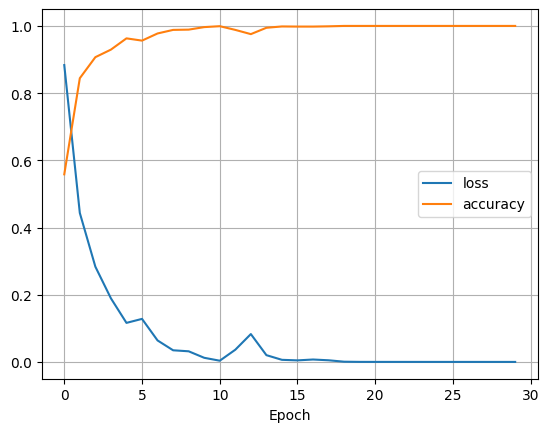

In [110]:
# Plot a loss & accuracy against epoch graph
def plot_graph(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.xlabel('Epoch')
  plt.legend()
  plt.grid(True)
  plt.show

plot_graph(train_history)

In [111]:
# Compute the F1-score of the model
f1 = 2 * (precision * recall) / (precision + recall + 1e-7)

# Print the precision, recall and F1-score of the model
print('{:<25} {:>10} {:>10} {:>10}'.format('Model', 'Precision', 'Recall', 'F1-Score'))
print('-' * 60)
print('{:<25} {:>10.4f} {:>10.4f} {:>10.4f}'.format('Convolutional Neural Network', precision, recall, f1))

Model                      Precision     Recall   F1-Score
------------------------------------------------------------
Convolutional Neural Network     0.9068     0.9068     0.9068


<Figure size 1200x1000 with 0 Axes>

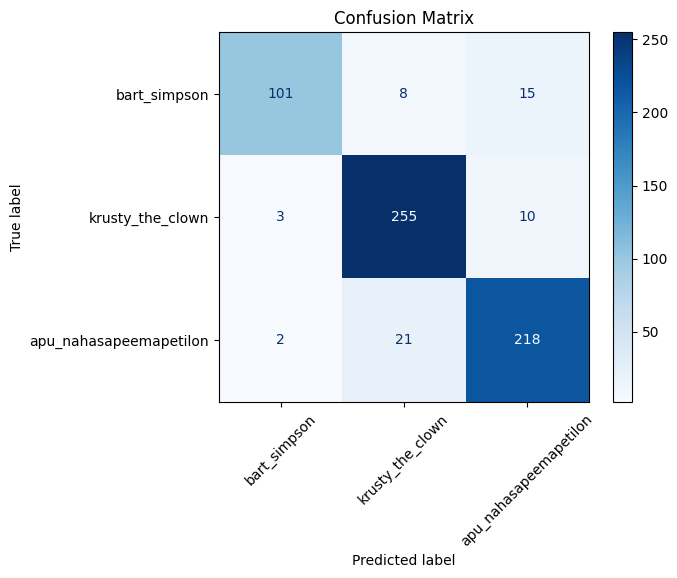

In [112]:
# Make predictions on the test set
y_prob = model.predict(test_gen, verbose=0)
y_pred = np.argmax(y_prob, axis=1)

# Compute the confusion matrix of the model
cm = confusion_matrix(test_gen.classes, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(12, 10))
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes_to_keep)
display.plot(cmap=plt.cm.Blues, xticks_rotation=45, values_format='d')
plt.title('Confusion Matrix')
plt.show()

#**Apply the Model**

In [113]:
import numpy as np

Found 3171 images belonging to 3 classes.


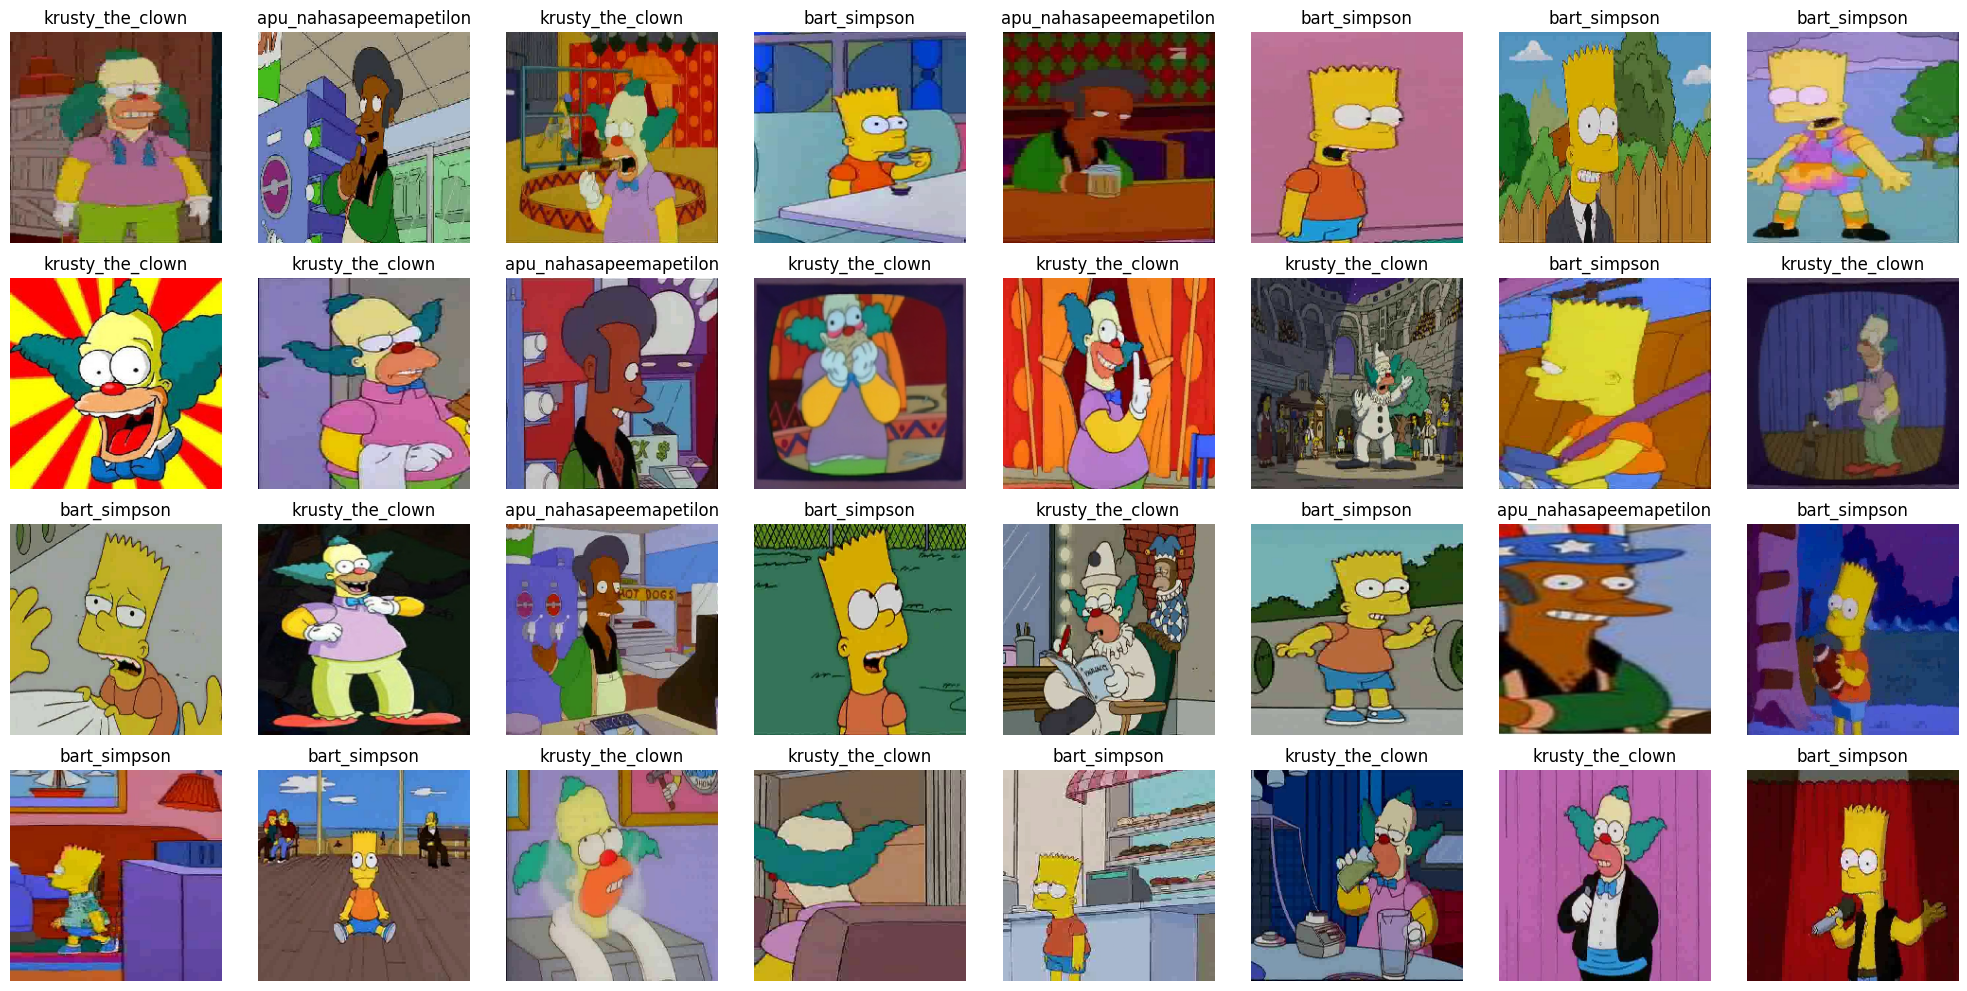

In [119]:
# Load dataset for predictions
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
pred_gen = datagen.flow_from_directory('/content/simpsons_dataset', target_size=(224, 224), class_mode=None, shuffle=True)

# Make predictions on 32 random images
X_pred = next(pred_gen)[:32]
y_prob = model.predict(X_pred, verbose=0)
y_pred = y_prob.argmax(axis=1)

# Map the class indexes to the class names
name_to_index = pred_gen.class_indices
index_to_name = {v: k for k, v in name_to_index.items()}
y_pred = [index_to_name[i] for i in y_pred]

# Plot the predictions
fig, axes = plt.subplots(4, 8, figsize=(20, 10))
axes = axes.ravel()
for i, ax in enumerate(axes):
    ax.imshow(X_pred[i])
    ax.set_title(y_pred[i])
    ax.axis('off')
plt.tight_layout()
plt.show()